#**Latihan SVM untuk Klasifikasi**

#**Tujuan**
######Sekarang saatnya kita mencoba menggunakan model SVM yang tersedia di library SKLearn. Untuk latihan kali ini kita akan memakai dataset Pima Indian. Dataset ini dikumpulkan oleh National Institute of Diabetes and Digestive and Kidney Diseases.

#**Tahapan Latihan**
#####Dataset berisi 8 kolom atribut dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut positif diabetes dan 0 menandakan sebaliknya. Terdapat 768 sampel yang merupakan 768 pasien perempuan keturunan suku Indian Pima.

#####Model machine learning yang akan kita buat bertujuan untuk mengklasifikasikan apakah seorang pasien positif diabetes atau tidak.

#####Tahapan latihan kali ini adalah:



1. Ubah data ke dalam Dataframe.
2. Bagi dataset.
3. Lakukan standarisasi.
4. Buat dan latih model.
5. Evaluasi model.





#**Codelab**
#####PTahap pertama yang perlu kita lakukan adalah mengunduh dataset Pima Indian Diabetes dari [tautan](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) berikut. Setelah mengunduh dataset, jangan lupa masukkan dataset ke dalam Google Colab.

#####Pada tahap selanjutnya kita akan mengimpor library pandas dan mengubah dataset menjadi sebuah dataframe.
#####Jika Anda menggunakan Colaboratory, dataset yang telah berhasil diunggah ke Colab akan tampil sebagai berikut.

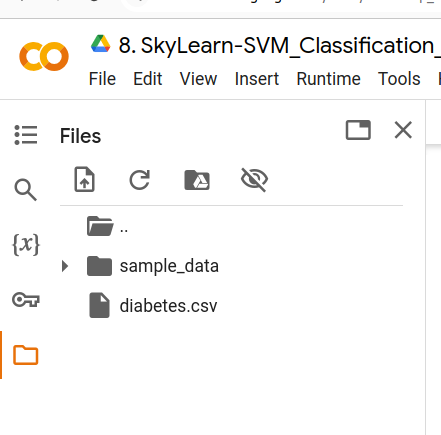


######Kemudian, impor library pandas dan ubah file csv menjadi dataframe dengan code berikut.



In [96]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
# df

######Lalu kita tampilkan 5 baris teratas dari dataframe untuk melihat isi dari dataset. Untuk melakukannya kita dapat menjalankan kode df.head() seperti di bawah.



In [97]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#####Hal paling penting selanjutnya adalah kita perlu mengecek apakah terdapat nilai-nilai yang hilang pada dataset serta apakah ada atribut yang bukan berisi bilangan numerik. Kita bisa melakukan ini dengan memanggil fungsi .info() pada dataframe.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#####Output dari fungsi info() menunjukkan bahwa semua atribut nilainya lengkap, dan juga nilai-nilai dari tiap kolom memiliki tipe data numerik yaitu int64 dan float64.

Pada tahap ini data sudah bisa dipakai untuk pelatihan model.
#####Kita lalu memisahkan antara atribut dan label pada dataframe. Untuk memisahkan kolom-kolom pada dataframe kamu bisa melihat dokumentasinya pada [tautan](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) ini.


In [99]:
#memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel

X = df[df.columns[:8]]

#memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']


#####Jika kita lihat, nilai-nilai pada dataset memiliki skala yang berbeda. Contohnya pada kolom Glucose dan kolom Diabetes Pedigree Function. Kita perlu mengubah nilai-nilai dari setiap atribut berada pada skala yang sama. Kita dapat mencoba menggunakan standarisasi dengan fungsi StandardScaler() dari SKLearn.



In [100]:
from sklearn.preprocessing import StandardScaler

#standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#####Setelah atribut dan label dipisah, kita bisa memisahkan data untuk training dan testing menggunakan fungsi .train_test_split().

In [101]:
from sklearn.model_selection import train_test_split

#memisahkan data training dan testing (in which assign data testing for 33% and 67% for data training)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


#####Kita kemudian membuat objek Support Vector Classifier dan menampungnya pada variabel clf. Akhirnya kita sampai pada tahapan yang kita tunggu-tunggu, kita memanggil fungsi fit untuk melatih model.

In [102]:
from sklearn.svm import SVC

#membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train,y_train)

SVC()

#####Kita kemudian membuat objek Support Vector Classifier dan menampungnya pada variabel clf. Akhirnya kita sampai pada tahapan yang kita tunggu-tunggu, kita memanggil fungsi fit untuk melatih model.

In [103]:
#menampilkan skor akurasi prediksi
testing_score = clf.score(X_test, y_test)
print("The prediction in testing is : {:.2f}".format(testing_score*100),"%")

The prediction in testing is : 75.59 %
